In [12]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

import keras
from keras.preprocessing import image
from keras.applications.vgg19 import (
    VGG19, preprocess_input, decode_predictions)

import glob

### PreTrained Models

Keras hosts diferent models pretrained on certain datasets

https://keras.io/applications

In [13]:
# Load the VGG19 model
# https://keras.io/applications/#VGG19
model = VGG19(
    include_top=True,
    weights='imagenet')

In [14]:
# Default Image Size for VGG19
# Image size is defined in the docs here: https://keras.io/applications/#vgg19
image_size = (224, 224)

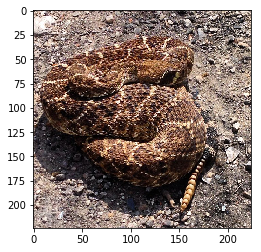

In [16]:
# Load the image and resize to the input dimensions that VGG19 was trained with
image_path = os.path.join("..", "Images", "DiamondBack Rattler.jpg")
img = image.load_img(image_path, target_size=image_size)
plt.imshow(img)

In [17]:
# Preprocess image for model prediction
# This step handles scaling and normalization for VGG19
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

Predicted: [('n01755581', 'diamondback', 0.3219313), ('n01756291', 'sidewinder', 0.25778142), ('n01729322', 'hognose_snake', 0.15250775)]


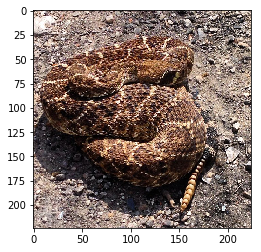

In [18]:
# Make predictions
predictions = model.predict(x)
print('Predicted:', decode_predictions(predictions, top=3)[0])
plt.imshow(img)

In [20]:
def process_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

In [21]:

# Refactor above steps into reusable function

def predict(image_path):
    """Use VGG19 to label image"""
    img = image.load_img(image_path, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predictions = model.predict(x)
    plt.imshow(img)
    print('Predicted:', decode_predictions(predictions, top=3)[0])

Predicted: [('n01755581', 'diamondback', 0.5475917), ('n01729322', 'hognose_snake', 0.3077355), ('n01756291', 'sidewinder', 0.046650745)]


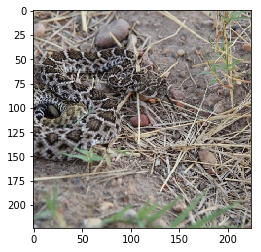

In [22]:
image_path = os.path.join("..", "Images", "DiamondBack Rattler2.jpg")
predict(image_path)

In [8]:

# batch of pics w iterative function

def test_vgg(path):
    for dataset in os.listdir(path):
        correct = 0
        total = 0
        print(dataset)
        img_list = glob.glob(snake_path + "/" + dataset + "/*")
        for img in img_list:
            img_path = img
            img = process_image(img_path)
            predictions = model.predict(img)
            prediction = decode_predictions(predictions, top=3)[0][0][1]
            print('Predicted:', decode_predictions(predictions, top=3)[0][0][1])
            if prediction == dataset:
                print("correct")
                correct += 1 
            else:
                print("false")
                
            total += 1
            
        print("Accuracy: ", correct/total)

In [9]:
snake_path = "../Images/snakes"
test_vgg(snake_path)

diamondback
Predicted: dung_beetle
false
Predicted: diamondback
correct
Predicted: birdhouse
false
Predicted: diamondback
correct
Predicted: diamondback
correct
Predicted: diamondback
correct
Predicted: hognose_snake
false
Predicted: mosquito_net
false
Predicted: diamondback
correct
Predicted: hognose_snake
false
Predicted: apiary
false
Predicted: diamondback
correct
Predicted: diamondback
correct
Predicted: diamondback
correct
Predicted: plow
false
Predicted: sidewinder
false
Predicted: hognose_snake
false
Predicted: hognose_snake
false
Predicted: seashore
false
Predicted: switch
false
Predicted: diamondback
correct
Predicted: nail
false
Predicted: American_alligator
false
Predicted: diamondback
correct
Predicted: hook
false
Predicted: stone_wall
false
Predicted: night_snake
false
Predicted: American_alligator
false
Predicted: doormat
false
Predicted: sidewinder
false
Predicted: breakwater
false
Predicted: hognose_snake
false
Predicted: horned_viper
false
Predicted: stinkhorn
false
Pr